In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.models import Sequential


import matplotlib.pyplot as plt
%matplotlib inline

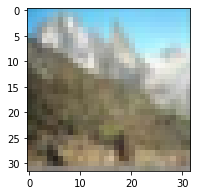

In [ ]:
classes = 100
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
plt.figure(figsize=(3,3))
plt.imshow(train_images[42], cmap=plt.cm.binary);
plt.show()

## A simple model

Epoch 1/20
3125/3125 [==============================] - 9s 3ms/step - loss: 1.4940 - accuracy: 0.4559 - val_loss: 1.2236 - val_accuracy: 0.5617
Epoch 2/20
3125/3125 [==============================] - 9s 3ms/step - loss: 1.1428 - accuracy: 0.5974 - val_loss: 1.0487 - val_accuracy: 0.6250
Epoch 3/20
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0043 - accuracy: 0.6450 - val_loss: 0.9875 - val_accuracy: 0.6548
Epoch 4/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.9077 - accuracy: 0.6801 - val_loss: 0.9519 - val_accuracy: 0.6691
Epoch 5/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8358 - accuracy: 0.7069 - val_loss: 0.9121 - val_accuracy: 0.6831
Epoch 6/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7776 - accuracy: 0.7258 - val_loss: 0.9436 - val_accuracy: 0.6801
Epoch 7/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7320 - accuracy: 0.7413 - val_loss: 0.9193 - val_accuracy:

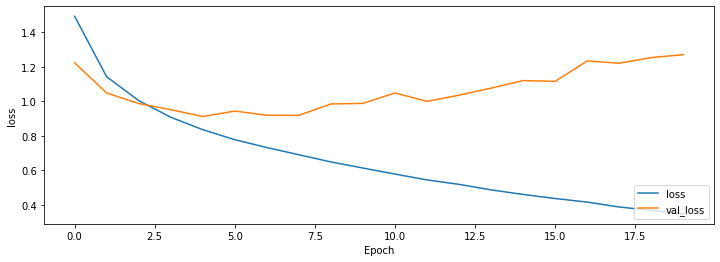

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # `from_logits=True` 

history = model.fit(train_images, train_labels,batch_size=16, epochs=20, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

## 2x the `nodes` 

Epoch 1/20
3125/3125 [==============================] - 20s 6ms/step - loss: 3.9964 - accuracy: 0.0853 - val_loss: 3.5642 - val_accuracy: 0.1534
Epoch 2/20
3125/3125 [==============================] - 19s 6ms/step - loss: 3.3184 - accuracy: 0.1946 - val_loss: 3.1468 - val_accuracy: 0.2391
Epoch 3/20
3125/3125 [==============================] - 19s 6ms/step - loss: 2.9859 - accuracy: 0.2578 - val_loss: 3.0731 - val_accuracy: 0.2587
Epoch 4/20
3125/3125 [==============================] - 19s 6ms/step - loss: 2.7874 - accuracy: 0.2986 - val_loss: 2.8419 - val_accuracy: 0.2947
Epoch 5/20
3125/3125 [==============================] - 19s 6ms/step - loss: 2.6463 - accuracy: 0.3290 - val_loss: 2.7631 - val_accuracy: 0.3134
Epoch 6/20
3125/3125 [==============================] - 18s 6ms/step - loss: 2.5230 - accuracy: 0.3517 - val_loss: 2.8092 - val_accuracy: 0.3046
Epoch 7/20
3125/3125 [==============================] - 18s 6ms/step - loss: 2.4258 - accuracy: 0.3727 - val_loss: 2.7035 - val_ac

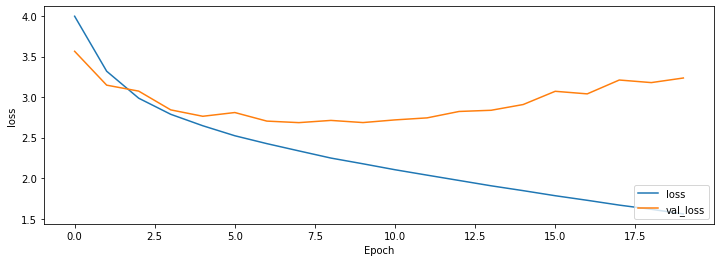

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=16, epochs=20, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

## switch to `elu`

Epoch 1/20
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3980 - accuracy: 0.5085 - val_loss: 1.1658 - val_accuracy: 0.5946
Epoch 2/20
3125/3125 [==============================] - 9s 3ms/step - loss: 1.0499 - accuracy: 0.6353 - val_loss: 0.9931 - val_accuracy: 0.6547
Epoch 3/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8895 - accuracy: 0.6900 - val_loss: 0.9062 - val_accuracy: 0.6886
Epoch 4/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7716 - accuracy: 0.7313 - val_loss: 0.9164 - val_accuracy: 0.6952
Epoch 5/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6667 - accuracy: 0.7719 - val_loss: 0.9811 - val_accuracy: 0.7028
Epoch 6/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.5662 - accuracy: 0.8035 - val_loss: 0.9532 - val_accuracy: 0.7137
Epoch 7/20
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4757 - accuracy: 0.8363 - val_loss: 1.0775 - val_accuracy:

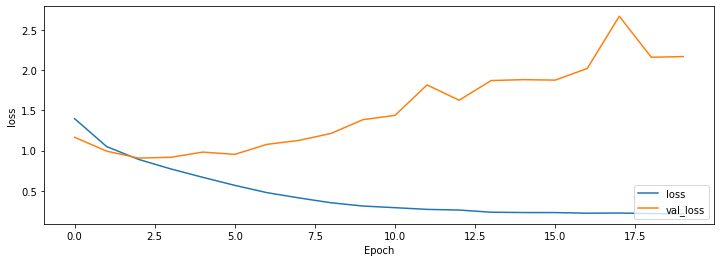

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='elu'))

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

history = model.fit(train_images, train_labels,batch_size=16, epochs=20, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

## Add `BatchNormalization` (BN)

some helpfull links 


*   [one](https://stackoverflow.com/a/61759744/5728614)
*   [two](https://github.com/ducha-aiki/caffenet-benchmark/blob/master/batchnorm.md)
*   [advanced- read the question and the first thread](https://www.reddit.com/r/MachineLearning/comments/67gonq/d_batch_normalization_before_or_after_relu/) 
> I can guarantee that recent code written by Christian *Szegedy, from the BN paper* applies relu before BN. It is still occasionally a topic of debate, though
* [^ but less advanced & less concise](https://chatbotsmagazine.com/countering-internal-covariate-shift-with-batch-normalization-f79d132a7812) 
> Simply put, it is a way to counteract the internal covariate shift between two layers of a neural network

* [Ordering of batch normalization and dropout?](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) 

#### What is Dropout

> The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

#### What is SpatialDropout2D

> This version performs the same function as Dropout, however it drops entire 2D feature maps instead of individual elements. If adjacent pixels within feature maps are strongly correlated (as is normally the case in early convolution layers) then regular dropout will not regularize the activations and will otherwise just result in an effective learning rate decrease. In this case, SpatialDropout2D will help promote independence between feature maps and should be used instead.

Epoch 1/20
1250/1250 [==============================] - 16s 13ms/step - loss: 3.5847 - accuracy: 0.1719 - val_loss: 3.3210 - val_accuracy: 0.2292
Epoch 2/20
1250/1250 [==============================] - 15s 12ms/step - loss: 2.7367 - accuracy: 0.3151 - val_loss: 2.8058 - val_accuracy: 0.3167
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 2.3331 - accuracy: 0.3932 - val_loss: 2.6880 - val_accuracy: 0.3452
Epoch 4/20
1250/1250 [==============================] - 15s 12ms/step - loss: 2.0453 - accuracy: 0.4549 - val_loss: 2.7980 - val_accuracy: 0.3353
Epoch 5/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.8033 - accuracy: 0.5062 - val_loss: 2.6893 - val_accuracy: 0.3724
Epoch 6/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5758 - accuracy: 0.5629 - val_loss: 2.7922 - val_accuracy: 0.3793
Epoch 7/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.3617 - accuracy: 0.6122 - val_loss: 2.8160 -

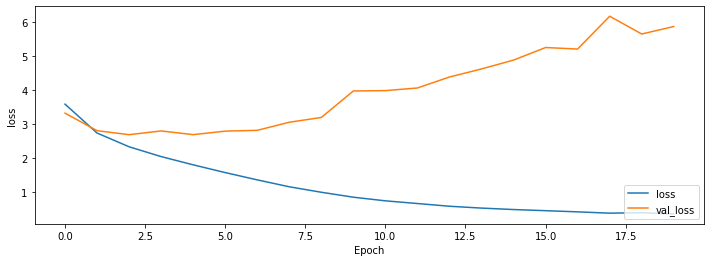

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='elu'))

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(classes))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=40, epochs=20, 
                    validation_data=(test_images, test_labels))

plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

### try out 'helpful link' 1, `Conv -> DropOut -> BatchNorm -> Activation -> Pool ` 

In [ ]:
# model = Sequential()
# model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3)))
# model.add(BatchNormalization())
# model.add(Activation('elu'))
# model.add(MaxPooling2D((2, 2)))


# model.add(Conv2D(128, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('elu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='elu'))

# model.add(Flatten())
# model.add(Dense(128, activation='elu'))
# model.add(Dense(classes))

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# history = model.fit(train_images, train_labels,batch_size=16, epochs=20, 
#                     validation_data=(test_images, test_labels))

# plt.figure(figsize=(12,4))
# plt.plot(history.history['loss'], label='loss');
# plt.plot(history.history['val_loss'], label = 'val_loss');
# plt.xlabel('Epoch')
# plt.ylabel('loss')
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
# print('test_acc:', round(test_acc,3))

SyntaxError: ignored

```
Epoch 20/20
3125/3125 [==============================] - 10s 3ms/step - loss: 1.4334 - accuracy: 0.5793 - val_loss: 3.6459 - val_accuracy: 0.3058
313/313 - 1s - loss: 3.6459 - accuracy: 0.3058
test_acc: 0.306
```

## Take the best model and address outfitting, and train to convergence
> if you have time, train the above models to 25 or 30 epoches, rather than 20

In [ ]:
## Conv -> Activation -> DropOut -> BatchNorm -> Pool
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='elu'))

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(classes))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=16, epochs=60, 
                    validation_data=(test_images, test_labels))

Epoch 1/60
3125/3125 [==============================] - 10s 3ms/step - loss: 3.6782 - accuracy: 0.1503 - val_loss: 4.4519 - val_accuracy: 0.1184
Epoch 2/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.9085 - accuracy: 0.2789 - val_loss: 3.0706 - val_accuracy: 0.2632
Epoch 3/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.5458 - accuracy: 0.3536 - val_loss: 3.3148 - val_accuracy: 0.2503
Epoch 4/60
3125/3125 [==============================] - 10s 3ms/step - loss: 2.2854 - accuracy: 0.4067 - val_loss: 2.9698 - val_accuracy: 0.3143
Epoch 5/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.0769 - accuracy: 0.4551 - val_loss: 2.7989 - val_accuracy: 0.3183
Epoch 6/60
3125/3125 [==============================] - 9s 3ms/step - loss: 1.8965 - accuracy: 0.4930 - val_loss: 2.9966 - val_accuracy: 0.2942
Epoch 7/60
3125/3125 [==============================] - 9s 3ms/step - loss: 1.7574 - accuracy: 0.5243 - val_loss: 2.6748 - val_accurac

KeyboardInterrupt: ignored

313/313 - 1s - loss: 4.6287 - accuracy: 0.3180
test_acc: 0.318


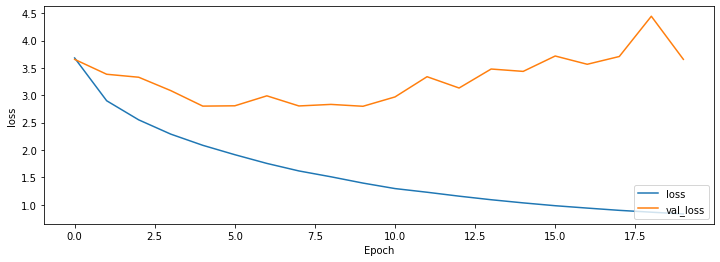

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

In [ ]:
## Conv -> Activation -> SpatialDropout2D -> BatchNorm -> Pool
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 3)))
model.add(SpatialDropout2D(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='elu'))
model.add(SpatialDropout2D(0.15))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(128, (3, 3), activation='elu'))

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(classes))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=16, epochs=60, 
                    validation_data=(test_images, test_labels))

Epoch 1/60
3125/3125 [==============================] - 9s 3ms/step - loss: 3.7962 - accuracy: 0.1361 - val_loss: 3.2271 - val_accuracy: 0.2263
Epoch 2/60
3125/3125 [==============================] - 9s 3ms/step - loss: 3.1017 - accuracy: 0.2463 - val_loss: 2.8711 - val_accuracy: 0.2881
Epoch 3/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.8067 - accuracy: 0.3050 - val_loss: 2.6681 - val_accuracy: 0.3364
Epoch 4/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.5968 - accuracy: 0.3463 - val_loss: 2.5963 - val_accuracy: 0.3482
Epoch 5/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.4231 - accuracy: 0.3817 - val_loss: 2.5023 - val_accuracy: 0.3703
Epoch 6/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.2874 - accuracy: 0.4113 - val_loss: 2.5107 - val_accuracy: 0.3683
Epoch 7/60
3125/3125 [==============================] - 9s 3ms/step - loss: 2.1732 - accuracy: 0.4338 - val_loss: 2.4883 - val_accuracy:

313/313 - 1s - loss: 3.6636 - accuracy: 0.3593
test_acc: 0.359


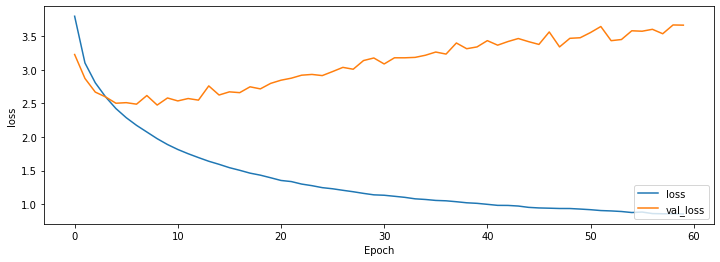

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))

[5 Techniques to Prevent Overfitting in Neural Networks](https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html)

what is `kernel_regularizer=l2(0.01)`
> l2(0.01) means that every coefficient in the weight matrix of the layer will add 0.01 * weight_coefficient_value**2 to the total loss of the network.

In [ ]:
## Conv -> Activation -> SpatialDropout2D -> BatchNorm -> Pool
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='elu', kernel_regularizer=l2(0.02), input_shape=(32, 32, 3)))
model.add(SpatialDropout2D(0.4))
model.add(BatchNormalization()) # norm(across the batch.....(..))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='elu', kernel_regularizer=l2(0.02))) # changed filter size 
model.add(SpatialDropout2D(0.3))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='elu'))
model.add(Dense(classes))

opt = tf.keras.optimizers.Adam(0.002) #  default 0.001
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15),
               tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience= 5)] # there is also a call back to save the best model

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, batch_size=60, epochs=32, # changed batch_size
                    validation_data=(test_images, test_labels),
                    callbacks = myCallbacks)

Epoch 1/32
834/834 [==============================] - 8s 9ms/step - loss: 4.3473 - accuracy: 0.0935 - val_loss: 3.6607 - val_accuracy: 0.1734 - lr: 0.0020
Epoch 2/32
834/834 [==============================] - 8s 9ms/step - loss: 3.7004 - accuracy: 0.1701 - val_loss: 3.4736 - val_accuracy: 0.2083 - lr: 0.0020
Epoch 3/32
834/834 [==============================] - 7s 9ms/step - loss: 3.4707 - accuracy: 0.2102 - val_loss: 3.2883 - val_accuracy: 0.2527 - lr: 0.0020
Epoch 4/32
834/834 [==============================] - 7s 9ms/step - loss: 3.3347 - accuracy: 0.2405 - val_loss: 3.1651 - val_accuracy: 0.2751 - lr: 0.0020
Epoch 5/32
834/834 [==============================] - 7s 9ms/step - loss: 3.2231 - accuracy: 0.2621 - val_loss: 3.1727 - val_accuracy: 0.2672 - lr: 0.0020
Epoch 6/32
834/834 [==============================] - 8s 9ms/step - loss: 3.1476 - accuracy: 0.2768 - val_loss: 3.0638 - val_accuracy: 0.2946 - lr: 0.0020
Epoch 7/32
834/834 [==============================] - 8s 9ms/step - lo

313/313 - 1s - loss: 2.8650 - accuracy: 0.3625
test_acc: 0.363


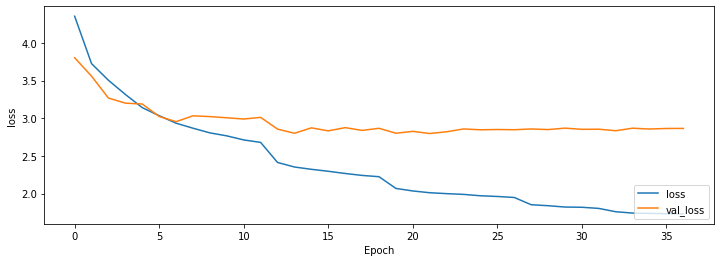

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label = 'val_loss');
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('test_acc:', round(test_acc,3))